# LAB6

ZAD1 implementacja PCA

In [1505]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()
digits = datasets.load_digits()

Text(0.5, 1.0, 'input data')

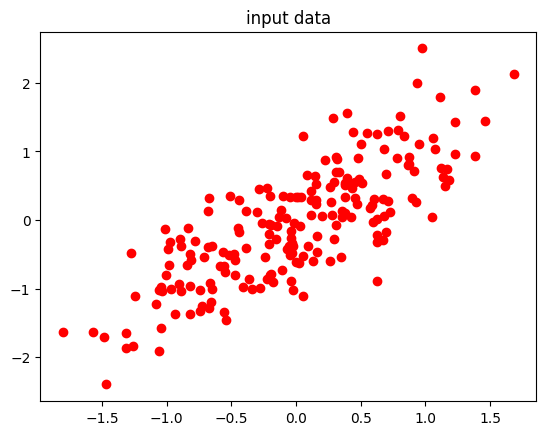

In [1512]:
points = np.dot(np.random.rand(2,2), np.random.randn(2, 200)).T
# print(points)
plt.scatter(points[:, 0], points[:, 1], color = 'red')
plt.title('input data')

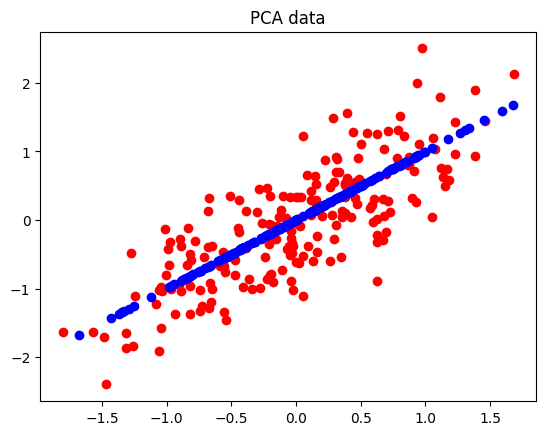

In [1513]:
def wiPCA(data, n_components):
    #normalizacja
    data_mean = np.mean(data, axis=0)
    normalized_data = data - data_mean

    #macierz kowariancji
    cov = np.cov(normalized_data.T)

    #wartosci, wektory wlasne
    eig_val, eig_vec = np.linalg.eigh(cov)
    indices = np.arange(0,len(eig_val), 1)

    #sortowanie aby zidentyfikowac najwazniejsze skladowe
    indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
    eig_val = eig_val[indices]
    eig_vec = eig_vec[:,indices]

    eig_vec_subset = eig_vec[:, 0:n_components]

    pca_data = np.dot(normalized_data, eig_vec_subset)

    return pca_data, eig_vec_subset, eig_val, data_mean


plt.scatter(points[:, 0], points[:, 1], color = 'red')
pca_data, eigen_vectors, _, _ = wiPCA(points, 1)
# plt.scatter(points[:, 0], points[:, 1], color = 'red')
plt.scatter(pca_data * eigen_vectors[0, 0], pca_data * eigen_vectors[0, 0], color = 'blue')
plt.title('PCA data')
plt.show()

ZAD2 a) / b)

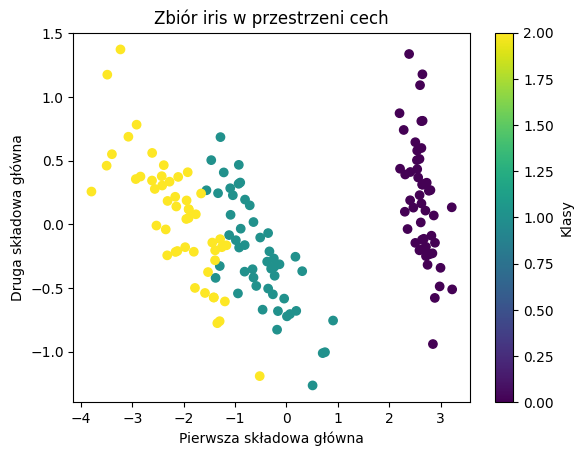

In [1514]:
Z_iris, _, _, _ = wiPCA(iris.data, 2)
plt.scatter(Z_iris[:,0], Z_iris[:,1], c=iris.target, cmap='viridis')
plt.title('Zbiór iris w przestrzeni cech')
plt.xlabel('Pierwsza składowa główna')
plt.ylabel('Druga składowa główna')
plt.colorbar(label='Klasy')
plt.show()

ZAD3

b), c)

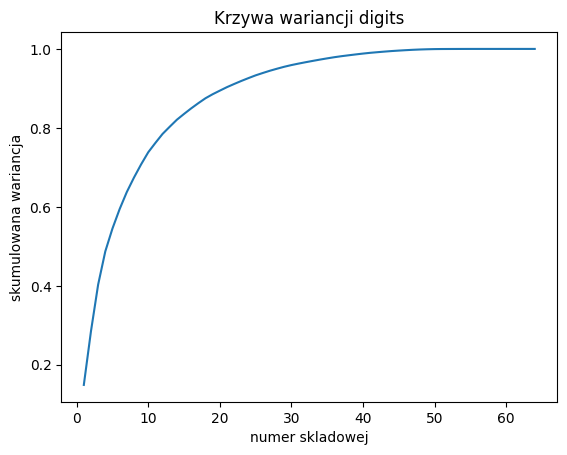

In [1515]:
Z_digits, _, eig_val, _ = wiPCA(digits.data, 2)
variance_ratio = np.cumsum(eig_val) / np.sum(eig_val)

plt.plot(range(1, len(variance_ratio) + 1), variance_ratio)
plt.title('Krzywa wariancji digits')
plt.xlabel('numer skladowej')
plt.ylabel('skumulowana wariancja')
plt.show()

d) Wizualizacja zbioru digits w przestrzeni cech

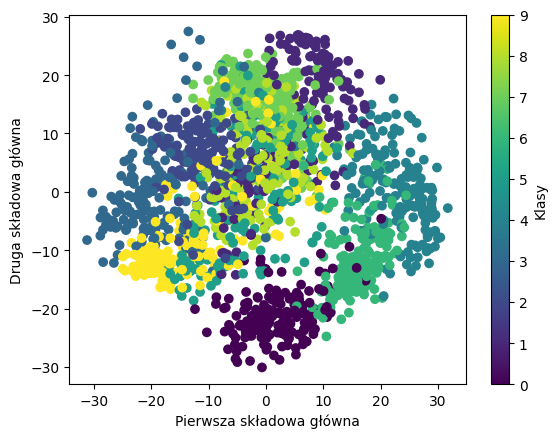

In [1516]:
plt.scatter(Z_digits[:,0], Z_digits[:,1], c=digits.target, cmap='viridis')
plt.xlabel('Pierwsza składowa główna')
plt.ylabel('Druga składowa główna')
plt.colorbar(label='Klasy')
plt.show()

e) Wizualizacja zmienności średniego błędu rekonstrukcji

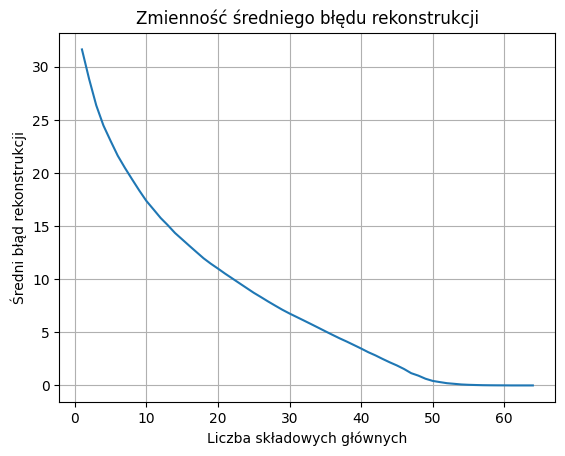

In [1517]:
# Funkcja do obliczania odległości euklidesowej
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Funkcja do rekonstrukcji danych po redukcji wymiarowości
def inverse_PCA(Z, W, X_mean):
    X_reconstructed = np.dot(Z, W.T) + X_mean
    return X_reconstructed

# Eksperyment z oceną średniego błędu rekonstrukcji
num_components = range(1, digits.data.shape[1] + 1)
mean_reconstruction_errors = []

for n in num_components:
    Z_n, W_n, _, X_mean_n = wiPCA(digits.data, n)
    X_reconstructed_n = inverse_PCA(Z_n, W_n, X_mean_n)
    reconstruction_errors = [euclidean_distance(digits.data[i], X_reconstructed_n[i]) for i in range(len(digits.data))]
    mean_reconstruction_error = np.mean(reconstruction_errors)
    mean_reconstruction_errors.append(mean_reconstruction_error)

# Wizualizacja zmienności średniego błędu rekonstrukcji
plt.plot(num_components, mean_reconstruction_errors)
plt.title('Zmienność średniego błędu rekonstrukcji')
plt.xlabel('Liczba składowych głównych')
plt.ylabel('Średni błąd rekonstrukcji')
plt.grid(True)
plt.show()
